News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# API Keys
consumer_key = "KgcH8qk275lHYKRl80NfMZ6Mq"
consumer_secret = "QOS9oDPWxrmrz4uDLaMsc5FekyWYnXMTl6lMefCXYjWwqhSXTz"
access_token = "971540250601361413-3QRZae1gU7FrOyzPG7yLe9BkRBDspEQ"
access_token_secret = "d5nERbzhVZ4pc4BXRZNu5M4bw618SDJAvHTwB7qZYPIsM"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Search
target_users = ("@FoxNews", "@CBS", "@BBC",  "@nytimes", "@CNN")

# Array to hold sentiment
Sentiment_array = []

In [3]:
for user in target_users:
    tweetcount=100
    print("Extracting tweets from %s"%user)
    
    # Five most recent pages
    for x in range(5):
        public_tweets=api.user_timeline(user,page=x)
        # For each tweet 
        for tweet in public_tweets:
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            # Store Tweet in Array
            Sentiment_array.append({"Media":user,
                                    "Tweet Text":tweet["text"],
                                    "Compound":compound,
                                    "Positive":pos,
                                    "Negative":neg,
                                    "Neutral":neu,
                                    "Date":tweet["created_at"],
                                    "Tweets Ago":tweetcount})
            #Decreasing tweet count by 1
            tweetcount-=1

Extracting tweets from @FoxNews
Extracting tweets from @CBS
Extracting tweets from @BBC
Extracting tweets from @nytimes
Extracting tweets from @CNN


In [9]:
# Create & Improve Dataframe
Sentiment_DF=pd.DataFrame.from_dict(Sentiment_array)
Sentiment_DF['Media'] = Sentiment_DF['Media'].map(lambda x: x.lstrip('@'))
Sentiment_DF=Sentiment_DF[["Media","Date","Tweet Text","Compound","Positive","Negative","Neutral","Tweets Ago"]]
# Storing into a CSV File\
Sentiment_DF.to_csv("News_Mood_Analysis.csv")

Sentiment_DF.head()

,Media,Date,Tweet Text,Compound,Positive,Negative,Neutral,Tweets Ago
0,FoxNews,Tue Mar 20 18:23:08 +0000 2018,.@POTUS hosts a law enforcement roundtable on ...,0.0000,0.000,0.000,1.000,100
1,FoxNews,Tue Mar 20 18:15:32 +0000 2018,.@PressSec: “The president has been very clear...,0.1761,0.125,0.095,0.779,99
2,FoxNews,Tue Mar 20 18:10:43 +0000 2018,.@PressSec: “We want to continue to have a dia...,0.0772,0.115,0.000,0.885,98
3,FoxNews,Tue Mar 20 18:09:42 +0000 2018,.@PressSec on Texas bombings and Maryland scho...,-0.3182,0.000,0.119,0.881,97
4,FoxNews,Tue Mar 20 18:04:57 +0000 2018,.@PressSec: “Sanctuary jurisdictions release t...,-0.5267,0.000,0.167,0.833,96


The first plot will be and/or feature the following:

Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.
The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

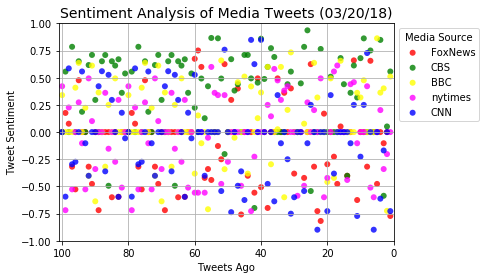

In [14]:
Media_Source=Sentiment_DF["Media"].unique()

#Plot per media source
for media in Media_Source:
    # Creating a temporary data frame to store for only one media channel at a time
    Temp_DF=Sentiment_DF[Sentiment_DF["Media"]==media]
    plt.scatter(Temp_DF["Tweets Ago"],Temp_DF["Compound"], marker="o", linewidth=0, alpha=0.8, label=media,
                facecolors=Temp_DF.Media.map({"BBC": "yellow", "CBS" : "green",  "CNN": 'blue',
                                              "FoxNews":"red","nytimes":"magenta"}))


plt.legend(bbox_to_anchor = (1,1),title="Media Source")
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")), fontsize=14)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Sentiment")
#Setting the x_axis and y_axis limits
plt.xlim(101,0)
plt.ylim(-1,1)
# Setting the grid
plt.grid(True)

# Saving the figue
plt.savefig("News_Mood_of_Media_.png",bbox_inches='tight')

plt.show()

In [15]:
News_Compound=Sentiment_DF.groupby("Media").mean()["Compound"].to_frame()
News_Compound.reset_index(inplace=True)
News_Compound

,Media,Compound
0,BBC,0.098042
1,CBS,0.339271
2,CNN,-0.054861
3,FoxNews,-0.092513
4,nytimes,-0.023200


Your final Jupyter notebook must:

Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.

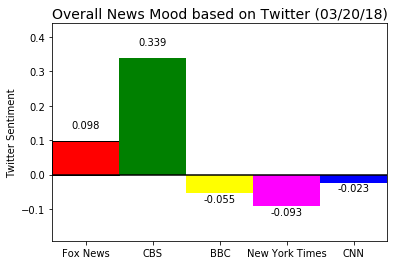

In [16]:

# Setting the x_axis and y-axis value
x_axis=News_Compound.index.values
y_axis=News_Compound["Compound"]

# Intializing the plots
fig,ax=plt.subplots()

#Creating the plot
bars=ax.bar(x_axis,y_axis,align="edge",width=1,linewidth=1,
            edgecolor='black',color=["red","green","yellow","magenta","blue"])

tick_locations = [value+0.5 for value in range(len(x_axis))]
plt.xticks(tick_locations,["Fox News","CBS","BBC","New York Times","CNN"])

# Setting the text label in the bar graph
News_Compound["Positive"]=News_Compound["Compound"]>0
height = News_Compound.Positive.map({True: 0.03 , False: -0.03})
# Setting the value label on the each bar
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()+height[bars.index(bar)],
            round(News_Compound["Compound"][bars.index(bar)],3),ha='center', va='bottom')


# Setting the x_axis limits
ax.set_xlim(0, len(x_axis))
#Setting the y_axis limits dynamically by finding the maximum and minimum value in y-axis
ax.set_ylim(min(y_axis)-0.1, max(y_axis)+0.1)

# Setting a horizontal line at y=0
plt.hlines(0,0,len(x_axis))

# Setting the title of the graph
ax.set_title("Overall News Mood based on Twitter (%s)" % (time.strftime("%x")), fontsize=14)
# Setting the y_axis label
ax.set_ylabel("Twitter Sentiment")

# Saving the graph
plt.savefig("News Mood_based_on_Twitter.png",bbox_inches='tight')
plt.show()

Summary: 
-New York Times and BBC have the most negative sentiments
-CBS ranks the highest for positive sentiments and is below 0 fewer then other news sources
-CNN is the most nuetral through favoring below the nuetral line -.023

